# 역전파

## 인공 신경망의 이해(Neural Network Overview)

- 두 개의 입력과, 두 개의 은닉층 뉴런, 두 개의 출력층 뉴런을 사용하는 인공신경망
  - 은닉층과 출력층의 모든 뉴런은 활성화 함수로 시그모이드 함수를 사용

  ![backpropagation_1[1].PNG](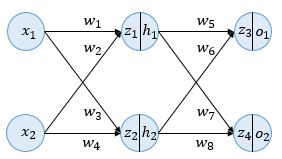)

- 은닉층과 출력층의 모든 뉴런에서 변수 $z$가 존재하는데 여기서 **변수 $z$는 이전층의 모든 입력과 각각의 가중치와 곱해진 값들이 모두 더해진 가중합을 의미**
  - 이 값은 뉴런에서 아직 시그모이드 함수를 거치지 않은 상태. **즉, 활성화 함수의 입력을 의미** 
- 우측의 | 를 지나서 존재하는 변수 $h$ 또는 $o$는 $z$가 시그모이드 함수를 지난 후의 값으로 각 뉴런의 출력값을 의미

<br> 

<br>

## 순전파(Forward Propagation)

![backpropagation_2[1].PNG](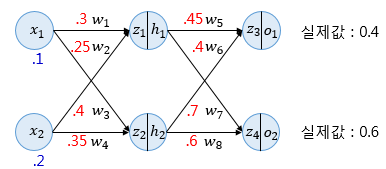)

- **파란색 숫자는 입력값을 의미하며, 빨간색 숫자는 각 가중치의 값을 의미** 
- 각 입력은 입력층에서 은닉층 방향으로 향하면서 각 입력에 해당하는 가중치와 곱해지고, 결과적으로 가중합으로 계산되어 은닉층 뉴런의 시그모이드 함수의 입력값이 됨. 
- $z_1$과 $z_2$는 시그모이드 함수의 입력으로 사용되는 각각의 값에 해당

$$z_{1}=w_{1}x_{1} + w_{2}x_{2}=0.3 \text{×} 0.1 + 0.25 \text{×} 0.2= 0.08$$

$$z_{2}=w_{3}x_{1} + w_{4}x_{2}=0.4 \text{×} 0.1 + 0.35 \text{×} 0.2= 0.11$$

- $z_1$과 $z_2$는 각각의 은닉층 뉴런에서 시그모이드 함수를 지나게 되는데 시그모이드 함수가 리턴하는 결과값은 은닉층 뉴런의 최종 출력값 **(각각 $h_1$과 $h_2$에 해당)**

$$h_{1}=sigmoid(z_{1}) = 0.51998934$$

$$h_{2}=sigmoid(z_{2}) = 0.52747230$$

- $h_1$과 $h_2$ 두 값은 다시 출력층의 뉴런으로 향하게 되는데, 이때 다시 각각의 값에 해당되는 가중치와 곱해지고, 다시 가중합 되어 출력층 뉴런의 시그모이드 함수의 입력값이 됨 (각각 $z_3$과 $z_4$에 해당)

$$z_{3}=w_{5}h_{1}+w_{6}h_{2} = 0.45 \text{×} h_{1} + 0.4 \text{×} h_{2} = 0.44498412$$
$$z_{4}=w_{7}h_{1}+w_{8}h_{2} = 0.7 \text{×} h_{1} + 0.6 \text{×} h_{2} = 0.68047592$$

- $z_3$과 $z_4$이 출력층 뉴런에서 시그모이드 함수를 지난 값은 이 인공 신경망이 최종적으로 계산한 출력값 (실제값을 예측하기 위한 값으로서 예측값)

$$o_{1}=sigmoid(z_{3})=0.60944600$$
$$o_{2}=sigmoid(z_{4})=0.66384491$$

- 오차(Error)를 계산하기 위한 손실 함수(Loss function)로는 평균 제곱 오차 MSE를 사용
  - 실제값을 $target$, 순전파를 통해 나온 예측값을 $output$으로 표현
- 각 오차를 모두 더하면 전체 오차 $E_{total}$

$$E_{o1}=\frac{1}{2}(target_{o1}-output_{o1})^{2}=0.02193381$$

$$E_{o2}=\frac{1}{2}(target_{o2}-output_{o2})^{2}=0.00203809$$

$$E_{total}=E_{o1}+E_{o2}=0.02397190$$

<br> 

<br>

## 역전파 

<br>

### 역전파 1단계(BackPropagation Step 1)
- 순전파가 입력층에서 출력층으로 향한다면, **역전파는 반대로 출력층에서 입력층 방향으로 계산하면서 가중치를 업데이트**
- 출력층 바로 이전의 은닉층을 N층이라고 하였을 때, 
  - 출력층과 N층 사이의 가중치를 업데이트하는 단계를 역전파 1단계
  - N층과 N층의 이전층 사이의 가중치를 업데이트 하는 단계를 역전파 2단계

  ![backpropagation_3[1].PNG](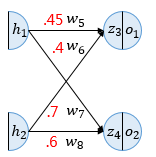)

- 역전파 1단계에서 업데이트 해야 할 가중치는 $w_{5}, w_{6}, w_{7}, w_{8}$ 총 4개
  - $w_{5}$에 대해서 경사 하강법을 수행하려면 가중치 
를 업데이트 하기 위해서 $w_{5}$를 업데이트 하기 위해서 $\frac{∂E_{total}}{∂w_{5}}$를 계산
  - **$E_{total}$은 순전파를 진행하고 계산했던 전체 오차값**

<br>

- **$\frac{∂E_{total}}{∂w_{5}}$를 계산하기 위해 미분의 연쇄 법칙(Chain rule)**

$$\frac{∂E_{total}}{∂w_{5}} = \frac{∂E_{total}}{∂o_{1}} \text{×} \frac{∂o_{1}}{∂z_{3}} \text{×} \frac{∂z_{3}}{∂w_{5}}$$



- $E_{total}$은 앞서 순전파를 진행하고 계산했던 전체 오차값으로써

$$E_{total}=\frac{1}{2}(target_{o1}-output_{o1})^{2} + \frac{1}{2}(target_{o2}-output_{o2})^{2}$$

- $\frac{∂E_{total}}{∂o_{1}}$은 

$$\frac{∂E_{total}}{∂o_{1}}=2 \text{×} \frac{1}{2}(target_{o1}-output_{o1})^{2-1} \text{×} (-1) + 0$$



-  $o_1$은 시그모이드 함수의 출력값.
- 시그모이드 함수의 미분은 $f(x) \text{×} (1-f(x))$ 
- 따라서 두번째 항의 미분 결과는 
  - https://en.wikipedia.org/wiki/Logistic_function#Derivative

$$\frac{∂o_{1}}{∂z_{3}}=o_{1}\text{×}(1-o_{1})=0.60944600(1-0.60944600)=0.23802157$$



- 마지막으로 세번째 항은 $h_{1}$의 값과 동일

$$\frac{∂z_{3}}{∂w_{5}}=h_{1}=0.51998934$$

<br>

* **우변의 모든 항을 계산**

$$\frac{∂E_{total}}{∂w_{5}} = 0.20944600 \text{×} 0.23802157 \text{×} 0.51998934 = 0.02592286$$

<br> 

- **학습률(learning rate) $\alpha$를 0.5로 경사 하강법을 통해 가중치를 업데이트**

$$w_{5}^{+}=w_{5}-α\frac{∂E_{total}}{∂w_{5}}=0.45- 0.5 \text{×} 0.02592286=0.43703857$$

<br>

- **이와 같은 원리로 $w_{6}^{+},\ w_{7}^{+},\ w_{8}^{+}$를 계산**

$$\frac{∂E_{total}}{∂w_{6}} = \frac{∂E_{total}}{∂o_{1}} \text{×} \frac{∂o_{1}}{∂z_{3}} \text{×} \frac{∂z_{3}}{∂w_{6}} → w_{6}^{+}=0.38685205$$

$$\frac{∂E_{total}}{∂w_{7}} = \frac{∂E_{total}}{∂o_{2}} \text{×} \frac{∂o_{2}}{∂z_{4}} \text{×} \frac{∂z_{4}}{∂w_{7}} → w_{7}^{+}=0.69629578$$

$$\frac{∂E_{total}}{∂w_{8}} = \frac{∂E_{total}}{∂o_{2}} \text{×} \frac{∂o_{2}}{∂z_{4}} \text{×} \frac{∂z_{4}}{∂w_{8}} → w_{8}^{+}=0.59624247$$

<br>

### 역전파 2단계(BackPropagation Step 2)
- 이번 단계에서 계산할 가중치는 $w_{1}, w_{2}, w_{3}, w_{4}$
  
  ![backpropagation_4[1].PNG](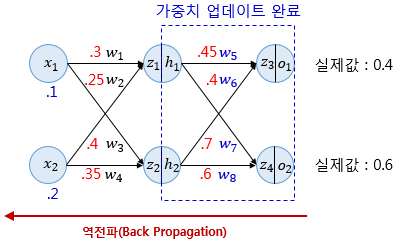)

- $w_{1}$를 업데이트 하기 위해서 $\frac{∂E_{total}}{∂w_{1}}$계산 필요
- $\frac{∂E_{total}}{∂w_{1}}$를 계산하기 위한 미분의 연쇄 법칙(Chain rule)

$$\frac{∂E_{total}}{∂w_{1}} = \frac{∂E_{total}}{∂h_{1}} \text{×} \frac{∂h_{1}}{∂z_{1}} \text{×} \frac{∂z_{1}}{∂w_{1}}$$

<br>

- 우변의 첫번째항인 $\frac{∂E_{total}}{∂h_{1}}$

$$\frac{∂E_{total}}{∂h_{1}} = \frac{∂E_{o1}}{∂h_{1}} + \frac{∂E_{o2}}{∂h_{1}}$$

  - 
    * $\frac{∂E_{o1}}{∂h_{1}}$

  $$\frac{∂E_{o1}}{∂h_{1}} = \frac{∂E_{o1}}{∂z_{3}} \text{×} \frac{{∂z_{3}}}{∂h_{1}} = \frac{∂E_{o1}}{∂o_{1}} \text{×} \frac{∂o_{1}}{∂z_{3}} \text{×} \frac{{∂z_{3}}}{∂h_{1}}$$
  
  $$= -(target_{o1}-output_{o1}) \text{×} o_{1}\text{×}(1-o_{1}) \text{×} w_{5}$$

  $$= 0.20944600 \text{×} 0.23802157 \text{×} 0.45 = 0.02243370$$

  - 
    * $\frac{∂E_{o2}}{∂h_{1}}$

    
  $$\frac{∂E_{o2}}{∂h_{1}} = \frac{∂E_{o2}}{∂z_{4}} \text{×} \frac{{∂z_{4}}}{∂h_{1}} = \frac{∂E_{o2}}{∂o_{2}} \text{×} \frac{∂o_{2}}{∂z_{4}} \text{×} \frac{{∂z_{4}}}{∂h_{1}} = 0.00997311$$

  $$\frac{∂E_{total}}{∂h_{1}} = 0.02243370 + 0.00997311 = 0.03240681$$

- **나머지 두 항 $\frac{∂h_{1}}{∂z_{1}}$과 $\frac{∂z_{1}}{∂w_{1}}$은 각각** 

$$\frac{∂h_{1}}{∂z_{1}} = h_{1}\text{×}(1-h_{1}) = 0.51998934(1-0.51998934)=0.24960043$$

$$\frac{∂z_{1}}{∂w_{1}} = x_{1} = 0.1$$

<br>

- **우변의 모든 항을 계산**

$$\frac{∂E_{total}}{∂w_{1}} = 0.03240681 \text{×} 0.24960043 \text{×} 0.1 = 0.00080888$$

<br>

- **이와 같은 원리로 $w_{2}^{+},\ w_{3}^{+},\ w_{4}^{+}$를 계산**

$$\frac{∂E_{total}}{∂w_{2}} = \frac{∂E_{total}}{∂h_{1}} \text{×} \frac{∂h_{1}}{∂z_{1}} \text{×} \frac{∂z_{1}}{∂w_{2}}  → w_{2}^{+}=0.24919112$$

$$\frac{∂E_{total}}{∂w_{3}} = \frac{∂E_{total}}{∂h_{2}} \text{×} \frac{∂h_{2}}{∂z_{2}} \text{×} \frac{∂z_{2}}{∂w_{3}}  → w_{3}^{+}=0.39964496$$

$$\frac{∂E_{total}}{∂w_{4}} = \frac{∂E_{total}}{∂h_{2}} \text{×} \frac{∂h_{2}}{∂z_{2}} \text{×} \frac{∂z_{2}}{∂w_{4}} → w_{4}^{+}=0.34928991$$

<br>

### 결과 확인
![backpropagation_5[1].PNG](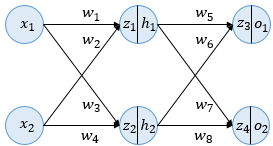)

- **업데이트 된 가중치에 대해서 다시 한 번 순전파를 진행하여 오차가 감소하였는지 확인**

$$z_{1}=w_{1}x_{1} + w_{2}x_{2}=0.29959556 \text{×} 0.1 + 0.24919112 \text{×} 0.2= 0.07979778$$

$$z_{2}=w_{3}x_{1} + w_{4}x_{2}=0.39964496 \text{×} 0.1 + 0.34928991 \text{×} 0.2= 0.10982248$$

$$h_{1}=sigmoid(z_{1}) = 0.51993887$$

$$h_{2}=sigmoid(z_{2}) = 0.52742806$$

<br>

$$z_{3}=w_{5}h_{1}+w_{6}h_{2} = 0.43703857 \text{×} h_{1} + 0.38685205 \text{×} h_{2} = 0.43126996$$

$$z_{4}=w_{7}h_{1}+w_{8}h_{2} = 0.69629578 \text{×} h_{1} + 0.59624247 \text{×} h_{2} = 0.67650625$$

$$o_{1}=sigmoid(z_{3})=0.60617688$$

$$o_{2}=sigmoid(z_{4})=0.66295848$$

<br>

$$E_{o1}=\frac{1}{2}(target_{o1}-output_{o1})^{2}=0.02125445$$

$$E_{o2}=\frac{1}{2}(target_{o2}-output_{o2})^{2}=0.00198189$$

<br>

$$E_{total}=E_{o1}+E_{o2}=0.02323634$$

<br>

- **기존의 전체 오차 $E_{total}$가 0.02397190였으므로 1번의 역전파로 오차가 감소한 것을 확인**

<br>

<br>

# 과적합(Overfitting) 방지
- 학습 데이터에 모델이 과적합되는 현상은 모델의 성능을 떨어트리는 주요 이슈
- 모델이 과적합되면 훈련 데이터에 대한 정확도는 높을지라도, 새로운 데이터. 즉, 검증 데이터나 테스트 데이터에 대해서는 제대로 동작하지 않음. 
- **이는 모델이 학습 데이터를 불필요할정도로 과하게 암기하여 훈련 데이터에 포함된 노이즈까지 학습한 상태라고 해석**

<br>

<br>

## 데이터 증강
- 모델은 데이터의 양이 적을 경우, 해당 데이터의 특정 패턴이나 노이즈까지 쉽게 암기하기 되므로, 과적합 현상이 발생할 확률이 증가. 
- **데이터의 양을 늘릴 수록 모델은 데이터의 일반적인 패턴을 학습하여 과적합을 방지**
- **데이터 증식 또는 증강(Data Augmentation) : 데이터의 양이 적을 경우에는 의도적으로 기존의 데이터를 조금씩 변형하고 추가하여 데이터의 양을 늘림**
  - **이미지의 경우, 이미지를 돌리거나 노이즈를 추가하고, 일부분을 수정하는 등으로 데이터를 증식**
  - **텍스트 데이터의 경우, 데이터를 증강하는 방법으로 번역 후 재번역을 통해 새로운 데이터를 만들어내는 역번역(Back Translation) 등의 방법**

<br>

<br>

## 모델의 복잡도 감소

- 인공 신경망의 복잡도는 은닉층(hidden layer)의 수나 매개변수의 수 등으로 결정
- 과적합 현상이 포착되었을 때, 인공 신경망 모델에 대해서 할 수 있는 한 가지 조치는 인공 신경망의 복잡도를 줄이는 것

<br>

#### **모델의 수용력(capacity) : 인공 신경망 모델에 있는 매개변수들의 수**

<br>

<br>

## 가중치 규제(Regularization) 적용
- 간단한 모델은 적은 수의 매개변수를 가진 모델
- **가중치 규제(Regularization) : 복잡한 모델을 좀 더 간단하게 하는 방법**

<br>

#### L1 규제 : 가중치 $w$들의 절대값 합계를 비용 함수에 추가. (L1 norm)

- **L1 규제는 기존의 비용 함수에 모든 가중치에 대해서 
$\lambda \mid w \mid$를 더 한 값을 비용 함수로 가짐**

<br>

#### L2 규제 : 모든 가중치 $w$들의 제곱합을 비용 함수에 추가 (L2 norm)
- **L2 규제는 기존의 비용 함수에 모든 가중치에 대해 $\frac{1}{2} \lambda w^2$를 더 한 값을 비용 함수로 가짐**

<br>

#### $\lambda$는 규제의 강도를 정하는 하이퍼파라미터 
- **$λ$가 크다면 모델이 훈련 데이터에 대해서 적합한 매개변수를 찾는 것보다, 추가된 항들을 작게 유지하는 규제를  우선한다는 의미**

<br>

#### **L1 규제와 L2 규제 모두 비용 함수를 최소화하기 위해서는 가중치 $w$들의 값이 작아져야 한다는 특징 존재**
- **L1 규제를 사용하면 비용 함수가 최소가 되게 하는 가중치와 편향을 찾는 동시에, 가중치들의 절대값의 합도 최소가 되어야 함**
  - **이렇게 되면, 가중치 w의 값들은 0 또는 0에 가까이 작아져야 하므로 어떤 특성들은 모델을 만들 때 거의 사용되지 않음**
  - 예 : $H(X) = w_{1}x_{1} + w_{2}x_{2} + w_{3}x_{3} + w_{4}x_{4}$에 L1 규제를 사용하였더니, $w_{3}$의 값이 0이 됨 $→$ $x_3$특성은 사실 모델의 결과에 별 영향을 주지 못하는 특성임을 의미
- L2 규제는 L1 규제와는 달리 가중치들의 제곱을 최소화하므로, **$w$의 값이 완전히 0이 되기보다는 0에 가까워지기는 경향**
- **L1 규제는 어떤 특성들이 모델에 영향을 주고 있는지를 정확히 판단하고자 할 때 유용**
- **대게 L2 규제가 더 잘 동작하므로 L2 규제를 권장**
- **인공 신경망에서 L2 규제는 가중치 감쇠(weight decay)**

<br>

<br>

## 드롭아웃(Dropout)
- 드롭아웃은 학습 과정에서 신경망의 일부를 사용하지 않는 방법

![드롭아웃[1].PNG](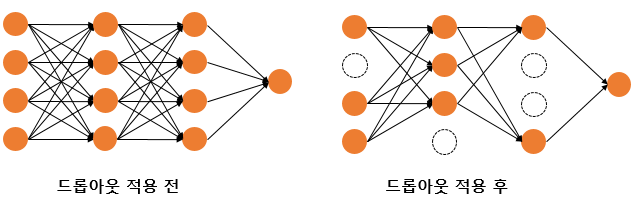)



- 예를 들어 드롭아웃의 비율을 0.5로 한다면, **학습 과정마다 랜덤으로 절반의 뉴런을 사용하지 않고, 절반의 뉴런만을 사용**

- 드롭아웃은 신경망 학습 시에만 사용하고, 예측 시에는 사용하지 않는 것이 일반적
- **학습 시에 인공 신경망이 특정 뉴런 또는 특정 조합에 너무 의존적이게 되는 것을 방지하고, 매번 랜덤 선택으로 뉴런들을 사용하지 않으므로 서로 다른 신경망들을 앙상블하여 사용하는 것 같은 효과를 내어 과적합을 방지**

<br>

<br>

# 기울기 소실(Gradient Vanishing)과 폭주(Exploding)

<br>

#### **기울기 소실(Gradient Vanishing)** 
- 역전파 과정에서 입력층으로 갈 수록 기울기(Gradient)가 점차적으로 작아지는 현상
- 입력층에 가까운 층들에서 가중치들이 업데이트가 제대로 되지 않으며 결국 최적의 모델을 찾지 못함

<br>

#### 기울기 폭주(Gradient Exploding)
- 기울기가 점차 커지며 가중치들이 비정상적으로 큰 값이 되면서 결국 발산하는 현상
- 순환 신경망(Recurrent Neural Network, RNN)에서 쉽게 발생

<br>

### ReLU와 ReLU의 변형
- 시그모이드 함수를 사용하면 입력의 절대값이 클 경우에 시그모이드 함수의 출력값이 0 또는 1에 수렴하면서 기울기가 0에 가까워짐 $→$**역전파 과정에서 전파 시킬 기울기가 점차 사라져서 입력층 방향으로 갈 수록 제대로 역전파가 되지 않는 기울기 소실 문제가 발생**

- **기울기 소실을 완화하는 가장 간단한 방법은 은닉층의 활성화 함수로 시그모이드나 하이퍼볼릭탄젠트 함수 대신에 ReLU나 ReLU의 변형 함수와 같은 Leaky ReLU를 사용하는 것**

<br>

```
- 은닉층에서는 시그모이드 함수를 사용하지 말 것
- Leaky ReLU를 사용하면 모든 입력값에 대해서 기울기가 0에 수렴하지 않아 죽은 ReLU 문제를 해결
- 은닉층에서는 ReLU나 Leaky ReLU와 같은 ReLU 함수의 변형들을 사용
```

<br>

<br>

## 그래디언트 클리핑(Gradient Clipping)
- **기울기 값을 자르는 것을 의미** 
  - 기울기 폭주를 막기 위해 임계값을 넘지 않도록 값을 자르며, 임계치만큼 크기를 감소
- RNN에서 유용
  - RNN은 역전파 과정에서 시점을 역행하면서 기울기를 구함 $→$ 이때 기울기가 너무 커질 수 있음

<br>

<br>

## 가중치 초기화(Weight initialization)
- 같은 모델을 훈련시키더라도 가중치가 초기에 어떤 값을 가졌느냐에 따라서 모델의 훈련 결과가 달라짐 
- 가중치 초기화만 적절히 해줘도 기울기 소실 문제과 같은 문제를 완화

<br>

### 세이비어 초기화(Xavier Initialization)
- 논문 : http://proceedings.mlr.press/v9/glorot10a/glorot10a.pdf

<br>

- 2010년 세이비어 글로럿과 요슈아 벤지오는 가중치 초기화가 모델에 미치는 영향을 분석하여 새로운 초기화 방법을 제안
- 이 초기화 방법은 세이비어(Xavier Initialization) 초기화 또는 글로럿 초기화(Glorot Initialization)
- 균등 분포(Uniform Distribution) 또는 정규 분포(Normal distribution)로 초기화 할 때 두 가지 경우로 나뉘며, 이전 층의 뉴런 개수와 다음 층의 뉴런 개수를 활용

<br>

- **이전 층의 뉴런의 개수가 $n_{in}$, 다음 층의 뉴런의 개수가 $n_{out}$일 때, 균등 분포를 사용하여 가중치를 초기화할 경우 다음과 같은 균등 분포 범위를 사용**
  - $\sqrt{\frac{6}{ n_{in} + n_{out} }}$를 $m$이라고 하였을 때, $-m$과 $+m$사이의 균등 분포를 의미

$$W \sim Uniform(-\sqrt{\frac{6}{ n_{in} + n_{out} }}, +\sqrt{\frac{6}{ n_{in} + n_{out} }})$$

<br> 

- **정규 분포로 초기화할 경우**
$$σ=\sqrt{\frac { 2 }{ n_{ in }+n_{ out } } }$$

<br>

- **세이비어 초기화는 여러 층의 기울기 분산 사이에 균형을 맞춰서 특정 층이 너무 주목을 받거나 다른 층이 뒤쳐지는 것을 방지**
- **세이비어 초기화는 시그모이드 함수나 하이퍼볼릭 탄젠트 함수와 같은 S자 형태인 활성화 함수와 함께 사용할 경우에는 좋은 성능을 보이지만, ReLU와 함께 사용할 경우에는 성능이 좋지 않음.** 
- ReLU 함수 또는 ReLU의 변형 함수들을 활성화 함수로 사용할 경우에는 He 초기화(He initialization)사용 권장

<br>

### He 초기화(He initialization)
- 논문 : https://www.cv-foundation.org/openaccess/content_iccv_2015/papers/He_Delving_Deep_into_ICCV_2015_paper.pdf

<br>

- He 초기화(He initialization)는 세이비어 초기화와 유사하게 정규 분포와 균등 분포 두 가지 경우로 구분
- **He 초기화는 세이비어 초기화와 다르게 다음 층의 뉴런의 수를 반영하지 않음**

<br>

- He 초기화에서 균등 분포로 초기화 할 경우에는 다음과 같은 균등 분포 범위를 가짐
$$W\sim Uniform(- \sqrt{\frac { 6 }{ n_{in} } } , \space\space + \sqrt{\frac { 6 }{ n_{ in } } } )$$

<br>

- 정규 분포로 초기화할 경우

$$σ=\sqrt{\frac { 2 }{ n_{ in } } }$$

<br>

```
- 시그모이드 함수나 하이퍼볼릭탄젠트 함수를 사용할 경우에는 세이비어 초기화 방법이 효율적
- ReLU 계열 함수를 사용할 경우에는 He 초기화 방법이 효율적

- 대게 ReLU + He 초기화 방법이 좀 더 보편적
```

<br>

<br>

## 배치 정규화(Batch Normalization)
- **내부 공변량 변화 (Internal Covariate Shift) : 학습 과정에서 층 별로 입력 데이터 분포가 달라지는 현상**
  - 이전 층들의 학습에 의해 이전 층의 가중치 값이 바뀌게 되면, **현재 층에 전달되는 입력 데이터의 분포가, 현재 층이 학습했던 시점의 분포와 차이가 발생**
  - 배치 정규화를 제안한 논문에서는 기울기 소실/폭주 등의 딥 러닝 모델의 불안전성이 층마다 입력의 분포가 달라지기 때문이라고 주장 (배치 정규화를 제안한 논문에서는 이렇게 주장했지만, 뒤에 이어서는 이에 대한 반박들이 존재. 하지만 그 이유가 어찌되었든 배치 정규화가 학습을 돕는다는 것은 명백)

```
- 공변량 변화는 훈련 데이터의 분포와 테스트 데이터의 분포가 다른 경우를 의미
- 내부 공변량 변화는 신경망 층 사이에서 발생하는 입력 데이터의 분포 변화를 의미
```


<br>

### 배치 정규화(Batch Normalization)
- **배치 정규화(Batch Normalization) : 한 번에 들어오는 배치 단위로 정규화하는 것을 의미**
  - **배치 정규화는 각 층에서 활성화 함수를 통과하기 전에 수행**
  - **입력에 대해 평균을 0으로 만들고, 정규화를 진행. 그리고 정규화 된 데이터에 대해서 스케일과 시프트를 수행**
  - **이때 두 개의 매개변수 $γ$와 $β$를 사용하는데, $γ$는 스케일을 위해 사용하고, $β$는 시프트를 하는 것에 사용하며 다음 레이어에 일정한 범위의 값들만 전달**

- **배치 정규화의 수식** ($BN$ : 배치 정규화)

  - Input : 미니 배치 $B = \{{x}^{(1)}, {x}^{(2)}, ..., {x}^{(m)}\}$
  - Output : $y^{(i)} = BN_{γ, β}(x^{(i)})$
    - $m$은 미니 배치에 있는 샘플의 수
    - $\mu_{B}$는 미니 배치 $B$에 대한 평균
    - $\sigma_{B}$는 미니 배치 $B$에 대한 표준편차
    - $\hat{x^{i}}$은 평균이 0이고 정규화 된 입력 데이터
    - $ϵ$은 $\sigma^2$가 0일 때, 분모가 0이 되는 것을 막는 작은 양수. 보편적으로 $10^{-5}$
    - $γ$는 정규화 된 데이터에 대한 스케일 매개변수로 학습 대상
    - $β$는 정규화 된 데이터에 대한 시프트 매개변수로 학습 대상
    - $y^{i}$는 스케일과 시프트를 통해 조정한 $BN$의 최종 결과

  <br>

  $$μ_{B} ← \frac{1}{m} \sum_{i=1}^{m} x^{(i)} \text{ # 미니 배치에 대한 평균 계산}$$

  $$σ^2_{B} ← \frac{1}{m} \sum_{i=1}^{m} (x^{(i)} - μ_{B})^{2}\text{ # 미니 배치에 대한 분산 계산}$$

  $$\hat{x}^{(i)} ← \frac{x^{(i)} - μ_{B}}{\sqrt{σ^2_{B}+ε}}\text{ # 정규화}$$

  $$y^{(i)} ← γ\hat{x}^{(i)} + β = BN_{γ, β}(x^{(i)}) \text{ # 스케일 조정(γ)과 시프트(β)를 통한 선형 연산}$$

- **배치 정규화는 학습 시 배치 단위의 평균과 분산들을 차례대로 받아 이동 평균과 이동 분산을 저장해놓았다가, 테스트 할 때는 해당 배치의 평균과 분산을 구하지 않고 구해놓았던 평균과 분산으로 정규화**

<br>

```
- 배치 정규화를 사용하면 시그모이드 함수나 하이퍼볼릭탄젠트 함수를 사용하더라도 기울기 소실 문제가 크게 개선
- 가중치 초기화에 훨씬 덜 민감
- 훨씬 큰 학습률을 사용할 수 있어 학습 속도를 개선
- 미니 배치마다 평균과 표준편차를 계산하여 사용하므로 훈련 데이터에 일종의 잡음 주입의 부수 효과로 과적합을 방지하는 효과 존재. 다시 말해, 마치 드롭아웃과 비슷한 효과.
- 드롭 아웃과 함께 사용하는 것이 권장.
- 배치 정규화는 모델을 복잡하게 하며, 추가 계산을 하는 것이므로 테스트 데이터에 대한 예측 시에 실행 시간이 느려짐 
- 서비스 속도를 고려하는 관점에서는 배치 정규화가 꼭 필요한지 고민이 필요
- 배치 정규화의 효과는 굉장하지만 내부 공변량 변화때문은 아니라는 논문도 존재 : https://arxiv.org/pdf/1805.11604.pdf
```

<br>

#### 배치 정규화의 한계
1. **미니 배치 크기에 의존**
- **배치 정규화는 너무 작은 배치 크기에서는 잘 동작하지 않을 수 있음** 
  - e.g 배치 크기를 1로 하게되면 분산은 0이 됩니다. 작은
  - 미니 배치에서는 배치 정규화의 효과가 극단적으로 작용되어 훈련에 악영향을 줄 수 있음 
- **배치 정규화를 적용할때는 작은 미니 배치보다는 크기가 어느정도 되는 미니 배치에서 하는 것이 권장**

2. **RNN에 적용하기 어려움**

<br>

### 층 정규화(Layer Normalization)
- $m$이 3이고, 특성의 수가 4일 때의 배치 정규화

  ![배치정규화[1].PNG](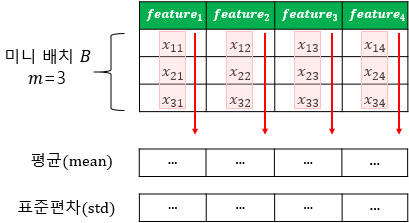)

- 층 정규화

  ![층정규화[1].PNG](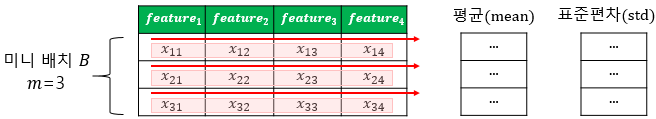)